In [1]:
from math import sin
import math
import time
import copy
import matplotlib.pyplot as plt

In [2]:
#186437
a1 = 9
a2 = -1
a3 = -1
N =937
stop = 10 ** -9

Macierz B -> wektor pobudzenia (o długości N)

In [3]:
def wektor_pobudzenia(N):
  storage = []
  [storage.append(math.sin(n*7)) for n in range(N)]
  return storage

Norma Eukilidesowa

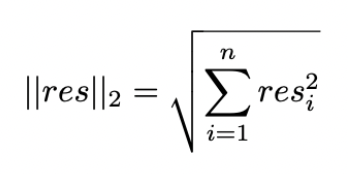

In [4]:
def norm(res):
    return math.sqrt(sum(r ** 2 for r in res))

In [5]:
def res(a, x, b):
    return [sum(row[i] * x[i] for i in range(len(x))) - b[row_index] for row_index, row in enumerate(a)]

Zrzut ekranu 2023-04-12 o 02.09.02.png

Macierz A -> macierz pasmowa

In [6]:
#wytwarzam macierz pasmowa taka jak w pdf
def macierz_pasmowa(a1, a2, a3, N):
    M = [[0]*N for i in range(N)]
    for i in range(N):
        for j in range(N):
            if i == j:
                M[i][j] = a1#diagonala
                #dolna macierz
                if j - 1 >= 0:
                    M[i][j - 1] = a2
                    if j - 2 >= 0:
                        M[i][j - 2] = a3
                #gorna macierz        
                if j + 1 < N:
                    M[i][j + 1] = a2
                    if j + 2 < N:
                        M[i][j + 2] = a3
                break
    return M

In [7]:
macierz_A = macierz_pasmowa(a1, a2, a3, N)
macierz_B = wektor_pobudzenia(N)

GAUSS METHOD

In [65]:
def Gauss(macierz_A, macierz_B):
    t_start = time.time()
    iterations = 0
    
    N = len(macierz_A)
    x = [0] * N#vector_x
    wynik = []
    
    while True:
        for i in range(N):#dla kazdego wiersza, wszystkie kolumny
            numerator = macierz_B[i]#licznik->macierzB
            denominator = macierz_A[i][i]#mianownik->diagonala
            for j in range(N):
                if i == j:#jesli ten sam wiersz co kolumna
                    continue
                numerator -= macierz_A[i][j] * x[j]
            x[i] = numerator / denominator
  
        residuum = res(macierz_A, x, macierz_B)
        iterations += 1

        wynik.append(norm(residuum))
        #dla zadania C
        #if iterations > 100:
            #break
        if norm(residuum) < stop :
            break
        
    t_result = round(time.time() - t_start, 2)
    print("Liczba iteracji Gauss-Seidel:", iterations)
    print("Czas wykonywania Gauss-Seidel:", t_result)
    plot1 = plt.figure()
    ax = plot1.add_subplot()
    plt.plot(wynik,label="Gauss-Seidel", color="red")
    plt.legend()
    ax.set_yscale("log")
    plt.ylabel('Norma')
    plt.xlabel('Iteracje')
    plt.title('Norma Gauss-Seidel')
    plt.show()
    return t_result

JACOBI METHOD

In [66]:
def Jacobi(macierz_A, macierz_B):
    t_start = time.time()

    iterations = 0
    N = len(macierz_A)
    x = [0] * N
    x_help = [0] * N
    wynik = []
    
    while True:
        for i in range(N): # dla wiersza, wszystkie kolumny
            numerator = macierz_B[i] # mianownik to macierz_B tak jak u Gaussa
            denominator = macierz_A[i][i] # macierz_A[i][i] -> diagonala
            
            for j in range(N):#kolumny
                if i != j:
                    numerator -= macierz_A[i][j] * x[j]
                    
            numerator /= denominator
            x_help[i] = numerator # przypisuje licznik do pomocniczego
        
        x = copy.deepcopy(x_help)#gleboka kopia obiektu
        
        residuum = res(macierz_A, x, macierz_B)

        iterations += 1

        wynik.append(norm(residuum))
        #dla zadania C
        #if iterations > 100:
            #break
        if norm(residuum) < stop:
            break

    t_result = round(time.time() - t_start, 2)
    print("Liczba iteracji Jacobi:", iterations)
    print("Czas wykonywania Jacobiego:", t_result)
    #print(wynik)
    plot1 = plt.figure()
    ax = plot1.add_subplot()
    plt.plot(wynik,label="Jacobi", color="red")
    plt.legend()
    ax.set_yscale("log")
    plt.ylabel('Norma')
    plt.xlabel('Iteracje')
    plt.title('Norma Jacobi')
    plt.show()
    return t_result


ZADANIE B

In [67]:
Gauss(macierz_A,macierz_B)

Liczba iteracji Gauss-Seidel: 17
Czas wykonywania Gauss-Seidel: 4.55


4.55

Liczba iteracji Jacobi: 22
Czas wykonywania Jacobiego: 7.01


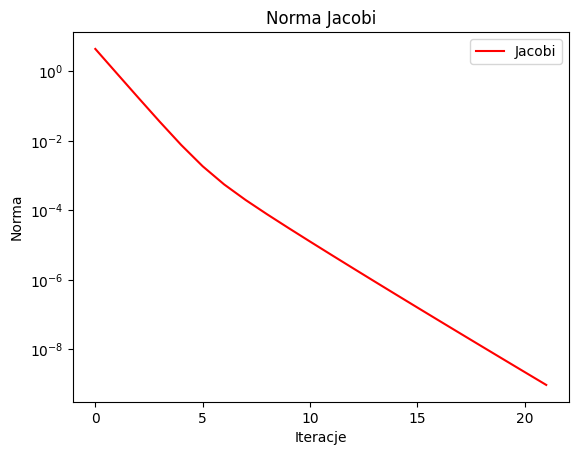

7.01

In [68]:
Jacobi(macierz_A,macierz_B)

In [46]:
macierz_C = macierz_pasmowa(3,-1,-1,N)

ZADANIE C

In [63]:
Gauss(macierz_C,macierz_B)

Liczba iteracji Gauss-Seidel: 101
Czas wykonywania Gauss-Seidel: 29.6


29.6

In [64]:
Jacobi(macierz_C,macierz_B)

Liczba iteracji Jacobi: 101
Czas wykonywania Jacobiego: 32.02


32.02